In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
flights = sns.load_dataset("flights")
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# 混合行列

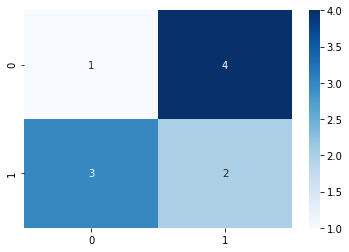

In [3]:
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

In [7]:
df = pd.read_csv(r"C:\Users\kurokiso\Desktop\toudai\research\analytics\data\3rd_notoverlap_feature\大腸菌決定係数.csv")
#df = df[df["NAME"]!="KTM"]

In [8]:
df

,Unnamed: 0,NAME,Rowid,nearest_source_dist,nearest_source_E,nearest_2,start_Ecoli,Ecoli_number,start_2,Ecoli
0,5,Hemja,10,942.017130,300,1,24,70,1,1
1,6,Hemja,11,387.068000,300,1,70,20,1,1
2,7,Hemja,12,940.535230,98,1,0,24,0,1
3,19,KTM,25,2225.610350,0,0,0,0,0,0
4,22,KTM,28,1186.184300,0,0,5,0,1,0
5,26,KTM,32,1472.412940,0,0,5,5,1,1
6,30,KTM,36,1676.730189,0,0,0,0,0,0
7,31,KTM,37,364.906230,40,1,100,0,1,0
8,32,KTM,38,230.208100,14,1,0,0,0,0
9,36,KTM,42,260.310500,0,0,15,26,1,1


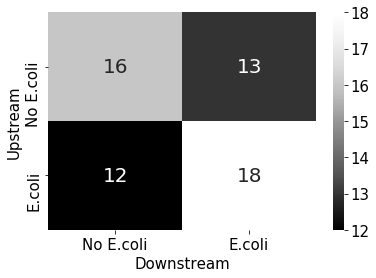

In [9]:
start = df.start_2
end = df.Ecoli
cm = confusion_matrix(start, end)

plt.figure()
with plt.style.context({'axes.labelsize':15,
                        'xtick.labelsize':15,
                        'ytick.labelsize':15}):
    xtics=["No E.coli", "E.coli"]
    ytics=["No E.coli", "E.coli"]
    ax = sns.heatmap(cm, annot=True, cmap='Greys_r', xticklabels=xtics,yticklabels=ytics, annot_kws={'size':20})
    plt.xlabel("Downstream")
    plt.ylabel("Upstream")

# 特徴量と大腸菌の関係

In [5]:
df=pd.read_csv('data.csv', encoding='cp932')
df = df.sample(frac=1, random_state=0)
upside_bool = df["up_side"] > 0
df.loc[upside_bool, "nearest_source_E"] = df["up_side"]
feature = ['processing', 'nearest_source_E', 'nearest_source_type', 'nearest_source_dist', 'no_water_days', 'build_count', 'density', 'agri_area']
y=df['Ecoli_number']
X=df.loc[:, feature]
X = X.fillna(X.mean())

In [6]:
for col in X.columns:
    print(col, stats.pearsonr(X[col].values, y))

processing (0.20211082180459677, 0.0039198994827523)
nearest_source_E (0.1047546446622356, 0.13789147865024534)
nearest_source_type (0.2141138794163427, 0.0022147778914133804)
nearest_source_dist (0.04776090395504301, 0.49968672166823935)
no_water_days (0.10829079140315548, 0.1250137235773406)
build_count (0.10617579417066603, 0.13259911237008024)
density (0.27533847250093524, 7.310706984398195e-05)
agri_area (-0.05392009036814477, 0.44597208741838024)


In [9]:
for col in X.columns:
    print(col, stats.pointbiserialr(X[col].values, y))

processing PointbiserialrResult(correlation=0.20211082180459677, pvalue=0.0039198994827523)
nearest_source_E PointbiserialrResult(correlation=0.1047546446622356, pvalue=0.13789147865024534)
nearest_source_type PointbiserialrResult(correlation=0.2141138794163427, pvalue=0.0022147778914133804)
nearest_source_dist PointbiserialrResult(correlation=0.04776090395504301, pvalue=0.49968672166823935)
no_water_days PointbiserialrResult(correlation=0.10829079140315548, pvalue=0.1250137235773406)
build_count PointbiserialrResult(correlation=0.10617579417066603, pvalue=0.13259911237008024)
density PointbiserialrResult(correlation=0.27533847250093524, pvalue=7.310706984398195e-05)
agri_area PointbiserialrResult(correlation=-0.05392009036814477, pvalue=0.44597208741838024)
